# CHSH Game Demonstration

This notebook illustrates the difference between the classical and quantum strategies for the CHSH non‑local game:

1. CHSH Game has the 75 % classical limit.
2. Exhaustively enumerate classical deterministic strategies to confirm that limit.
3. Implement the optimal quantum strategy with Qiskit, simulate it, and observe the ≈ 85 % win rate.

## 1 CHSH Game Rules

* **Inputs**: 
  - Alice gets $x \in \{0, 1\}$ (uniform random) 
  - Bob gets $y \in \{0, 1\}$ (uniform random)
  - They cannot communicate after receiving their inputs.
* **Outputs**: 
  - Alice returns $a \in \{0, 1\}$
  - Bob returns $b \in \{0, 1\}$
* **Win condition**: 
  - They win the round if $a \oplus b = x \wedge y$.

A purely classical (local hidden‑variable) strategy cannot win more than 3 out of the 4 possible inputs, so the best classical success probability is 75 %.  We’ll verify that first.

In [1]:
from itertools import product

def classical_win_rate(strategy):
    """Return the success probability for a deterministic strategy.
    strategy = (a0, a1, b0, b1) where each entry is 0 or 1.
    """
    a0, a1, b0, b1 = strategy
    wins = 0
    for x, y in product([0, 1], repeat=2):
        a = a0 if x == 0 else a1
        b = b0 if y == 0 else b1
        if (a ^ b) == (x & y):
            wins += 1
    return wins / 4  # there are 4 equally likely input pairs

strategies = list(product([0, 1], repeat=4))
max_classical = max(classical_win_rate(s) for s in strategies)
print(f"Best classical win rate: {max_classical * 100:.1f}%")

Best classical win rate: 75.0%


Here, Alice and Bob can use deterministic strategies, meaning they can pre‑agree on their outputs based on their inputs without any randomness involved. The pre-agreement represents that they have a local hidden variable (LHV) that determines their outputs.

- **Determinism**: The strategy tuple `(a0, a1, b0, b1)` represents a single, deterministic LHV. For a given hidden variable (mapping), their outputs are fixed based on their inputs:
  - If Alice receives input `x = 0`, she outputs `a0`.
  - If Alice receives input `x = 1`, she outputs `a1`.
  - If Bob receives input `y = 0`, he outputs `b0`.
  - If Bob receives input `y = 1`, he outputs `b1`.
- **Locality**: Alice's output depends only on her input `x` and the hidden variable, and Bob's output depends only on his input `y` and the same hidden variable. There is no communication between them after the referee's inputs are received.

Since we exhaustively enumerate all possible deterministic strategies, we can confirm the classical limit of 75 % success probability.

Note: a randomized strategy ultimately chooses one of these deterministic strategies at random, so it cannot exceed the classical limit either.

## 2 Quantum Strategy

### Mapping bits to signs

We map the bit values $\{0,1\}$ to signs $\{+1,-1\}$ to simplify the win condition $a\oplus b = x\wedge y$ into a product form that is easier to handle mathematically.

| Bit  ($0/1$) | Sign  ($+1/-1$) | Rule          |
| ------------ | --------------- | ------------- |
| $0$          | $+1$            | $(-1)^{0}=+1$ |
| $1$          | $-1$            | $(-1)^{1}=-1$ |

Define the observables (measurable outcomes) of Alice's and Bob's experiment as follows:

$$
A_x = (-1)^{a},
\qquad
B_y = (-1)^{b}.
$$

How `a` and `b` are determined depends on the strategy they use, but the key point is that they are now expressed as signs.

### XOR becomes a product

XOR ≡ addition modulo 2:

$$
a\oplus b \;=\; (a+b)\!\!\pmod{2}.
$$

Exponentiation turns that sum into a product:

$$
(-1)^{a}\,(-1)^{b}
      = (-1)^{\,a + b}
      = (-1)^{\,a\oplus b}.
$$

Hence

$$
A_x B_y = (-1)^{a\oplus b}.
$$

| $a$ | $b$ | $a\oplus b$ | $A_x=(-1)^a$ | $B_y=(-1)^b$ | Product $A_xB_y$ | $(-1)^{a\oplus b}$ |
| --- | --- | ----------- | ------------ | ------------ | ---------------- | ------------------ |
| 0   | 0   | 0           | $+1$         | $+1$         | **$+1$**         | $+1$               |
| 0   | 1   | 1           | $+1$         | $-1$         | **$-1$**         | $-1$               |
| 1   | 0   | 1           | $-1$         | $+1$         | **$-1$**         | $-1$               |
| 1   | 1   | 0           | $-1$         | $-1$         | **$+1$**         | $+1$               |

The last two columns are identical, confirming the equality.

### Translating the CHSH win condition

The referee’s rule is

$$
a\oplus b \;=\; x\wedge y.
$$

Convert both sides to sign language:

* **Left-hand side**

  $$
  A_x B_y = (-1)^{a\oplus b}.
  $$

* **Right-hand side**

  $$
  (-1)^{x\wedge y}
  \;=\;
  \begin{cases}
    +1 & (x,y)\in\{(0,0),\,(0,1),\,(1,0)\},\\[4pt]
    -1 & (x,y) = (1,1).
  \end{cases}
  $$

Thus the players **win** precisely when

$$
\boxed{\,A_x\,B_y = (-1)^{x\wedge y}\,}.
$$

Again, how $A_x$ and $B_y$ are determined depends on the strategy they use, but the key point is that this is the win condition expressed in terms of signs, which is easier to handle mathematically.

### Probability of winning

The referee picks $(x,y)$ uniformly, so the win probability is

$$
P_{\text{win}}
  = \frac{1}{4}\sum_{x,y\in\{0,1\}}
      \Pr\!\bigl[A_x B_y = (-1)^{x\wedge y}\bigr]
$$

Expanding the sum gives

$$
\begin{aligned}
P_{\text{win}}
    &= \frac{1}{4}\left(
      \Pr\!\bigl[A_0 B_0 = (-1)^{0\wedge 0}\bigr]
    + \Pr\!\bigl[A_0 B_1 = (-1)^{0\wedge 1}\bigr]
    + \Pr\!\bigl[A_1 B_0 = (-1)^{1\wedge 0}\bigr]
    + \Pr\!\bigl[A_1 B_1 = (-1)^{1\wedge 1}\bigr]
  \right) \\
    &= \frac{1}{4}\left(
      \Pr\!\bigl[A_0 B_0 = +1\bigr]
    + \Pr\!\bigl[A_0 B_1 = +1\bigr]
    + \Pr\!\bigl[A_1 B_0 = +1\bigr]
    + \Pr\!\bigl[A_1 B_1 = -1\bigr]
  \right)
\end{aligned}
$$

We can simplify this using the expectation value notation:

$\langle A_x B_y \rangle = \Pr\!\bigl[A_x B_y = +1\bigr] - \Pr\!\bigl[A_x B_y = -1\bigr]$

Since the total probability must equal 1, we can express the win probability as

$$
\Pr\!\bigl[A_x B_y = +1\bigr] + \Pr\!\bigl[A_x B_y = -1\bigr] = 1
$$

Therefore, we can rewrite the each term of the win probability as

$$
\begin{aligned}
\Pr\!\bigl[A_x B_y = +1\bigr] &= \frac{1}{2}\bigl(1 + \langle A_x B_y \rangle\bigr) \\
\Pr\!\bigl[A_x B_y = -1\bigr] &= \frac{1}{2}\bigl(1 - \langle A_x B_y \rangle\bigr)
\end{aligned}
$$

Expanding the win probability gives

$$
\begin{aligned}
P_{\text{win}}
  &= \frac{1}{4}\left(
      \frac{1}{2}\bigl(1 + \langle A_0 B_0 \rangle\bigr)
    + \frac{1}{2}\bigl(1 + \langle A_0 B_1 \rangle\bigr)
    + \frac{1}{2}\bigl(1 + \langle A_1 B_0 \rangle\bigr)
    + \frac{1}{2}\bigl(1 - \langle A_1 B_1 \rangle\bigr)
  \right) \\
  &= \frac12+\frac18\,S,
\end{aligned}
$$

where

$$
S \;=\;
  \langle A_0B_0\rangle +
  \langle A_0B_1\rangle +
  \langle A_1B_0\rangle -
  \langle A_1B_1\rangle
$$.

$S$ is called the **CHSH correlator**.

### CHSH Inequality

For a classical strategy, $A_x$ and $B_y$ are determined by their chosen strategy (local hidden variable), which we express as $\lambda$. 

For a given $\lambda$, we can express the CHSH correlator as

$$
\begin{aligned}
S(\lambda) &= A_0(\lambda)B_0(\lambda) + A_0(\lambda)B_1(\lambda) + A_1(\lambda)B_0(\lambda) - A_1(\lambda)B_1(\lambda) \\
&= A_0(\lambda)(B_0(\lambda) + B_1(\lambda)) + A_1(\lambda)(B_0(\lambda) - B_1(\lambda))
\end{aligned}
$$

Since $B_0$ and $B_1$ can only be $+1$ or $-1$, there are only four possiblities for the terms in the parentheses:

| $B_0$ | $B_1$ | $B_0 + B_1$ | $B_0 - B_1$ |
| ----- | ----- | ----------- | ----------- |
| $+1$  | $+1$  | $+2$        | $0$         |
| $+1$  | $-1$  | $0$         | $+2$        |
| $-1$  | $+1$  | $0$         | $-2$        |
| $-1$  | $-1$  | $-2$        | $0$         |

Since $A_0$ and $A_1$ can also only be $+1$ or $-1$, we can see that the maximum value of $S(\lambda)$ is 2 and the minimum value is -2, which gives us the CHSH inequality.

As such, classically, $|S| \le 2$ (the CHSH inequality), hence $P_{\text{win}} \le \frac{3}{4} = 75\%$, which matches the classical limit that we verified earlier.

### Pick the optimal quantum operators

The optimal quantum strategy ensures that Alice and Bob produce the **same output** for inputs $(x, y) = (0, 0), (0, 1), (1, 0)$, and **opposite outputs** for $(x, y) = (1, 1)$.

However, this is not possible since they cannot communicate after receiving their inputs.

So, they share the Bell state:

$$
\lvert\Phi^{+}\rangle = \tfrac{1}{\sqrt{2}} \bigl( \lvert 00\rangle + \lvert 11\rangle \bigr),
$$

and perform local operations on their respective qubits depending on their input bits $x$ and $y$ so that when they measure their qubits, they achieve the optimal quantum strategy.

- Since only the **winning probability** matters, it is sufficient to restrict all measurements to the **$X\text{-}Z$ plane** of the Bloch sphere. 
- If they were to measure along the **same axis** in all cases, they would always obtain the **same outcome**, which would prevent them from winning in the case $(x, y) = (1, 1)$, where opposite outputs are required.
- Ideally, they use different measurement axes for the case $(x, y) = (1, 1)$ to ensure opposite outputs, which is impossible since they cannot communicate after receiving their inputs.

So, they must predefine measurement choices that depend only on their **local inputs**, while still producing the desired correlations as much as possible.

To represent these measurement choices, each party selects an angle—$\alpha$ for Alice and $\beta$ for Bob—in the $X\text{-}Z$ plane of the Bloch sphere. These angles define the directions along which they perform projective measurements. The corresponding qubit states are:

$$
\begin{aligned}
|\psi_\alpha \rangle &= \cos\alpha\, |0\rangle + \sin\alpha\, |1\rangle \\
|\psi_\beta \rangle  &= \cos\beta\, |0\rangle + \sin\beta\, |1\rangle
\end{aligned}
$$

The probability amplitude for both parties obtaining the outcome $+1$, i.e., projecting the shared Bell state onto $|\psi_\alpha\rangle \otimes |\psi_\beta\rangle$, is given by:

$$
\begin{aligned}
\langle \psi_\alpha \otimes \psi_\beta \,|\, \Phi^+\rangle
&= \left\langle \big(\cos\alpha\, |0\rangle + \sin\alpha\, |1\rangle\big) \otimes \big(\cos\beta\, |0\rangle + \sin\beta\, |1\rangle\big)
\,\middle|\,
\tfrac{1}{\sqrt{2}} (|00\rangle + |11\rangle) \right\rangle \\
&= \tfrac{1}{\sqrt{2}} \left( \cos\alpha \cos\beta + \sin\alpha \sin\beta \right) \\
&= \tfrac{1}{\sqrt{2}} \cos(\alpha - \beta)
\end{aligned}
$$

The probability of both parties obtaining the outcome $+1$ is then given by the square of this amplitude:

$$\begin{aligned}
\Pr\!\bigl[A_x B_y = +1\bigr]
&= \left| \langle \psi_\alpha \otimes \psi_\beta \,|\, \Phi^+\rangle \right|^2 \\
&= \left( \tfrac{1}{\sqrt{2}} \cos(\alpha - \beta) \right)^2 \\
&= \tfrac{1}{2} \cos^2(\alpha - \beta)
\end{aligned}$$

This means that the correlation between Alice's and Bob's outcomes depends only on the angle difference $\alpha - \beta$.

The question is how to choose the angles $\alpha$ and $\beta$ to maximize the win probability.

To calculate $S$ in terms of $\alpha$ and $\beta$, we can use the inner product of the qubit states:

$$
\begin{aligned}
\langle \psi_\alpha | \psi_\beta \rangle 
&= (\cos\alpha\, |0\rangle + \sin\alpha\, |1\rangle)^\dagger (\cos\beta\, |0\rangle + \sin\beta\, |1\rangle) \\
&= \cos\alpha \cos\beta + \sin\alpha \sin\beta \\
&= \cos(\alpha - \beta)
\end{aligned}
$$

Therefore, we can express the CHSH correlator using orthogonal angles $\alpha_0, \alpha_1$ for Alice and $\beta_0, \beta_1$ for Bob such that the following holds:

$$
\begin{aligned}
S(\alpha_0, \alpha_1, \beta_0, \beta_1) &= \langle A_0 B_0 \rangle + \langle A_0 B_1 \rangle + \langle A_1 B_0 \rangle - \langle A_1 B_1 \rangle \\
  &= \cos(\alpha_0 - \beta_0) + \cos(\alpha_0 - \beta_1) + \cos(\alpha_1 - \beta_0) - \cos(\alpha_1 - \beta_1)
\end{aligned}
$$

Since only the **angle difference** matters, we can fix Alice's angles to Pauli measurements in the $Z\text{-}X$ plane for simplicity, which means $\alpha_0 = 0$ and $\alpha_1 = \frac{\pi}{2}$.

Bob should then choose his angles $\beta_0$ and $\beta_1$ to align constructively with Alice's measurements for the first three cases and destructively for the last case. 

That is, the angle $\alpha_1 - \beta_1$ must yield a negative cosine value, while the other three angles yield positive cosine values.

| (x, y) | Desired Correlation | Angle Constraint                                                 | Implied Condition                          |
|--------|---------------------|------------------------------------------------------------------|--------------------------------------------|
| (0, 0) | Constructive        | $-\frac{\pi}{2} < \alpha_0 - \beta_0 < \frac{\pi}{2}$            | $-\frac{\pi}{2} < \beta_0 < \frac{\pi}{2}$ |
| (0, 1) | Constructive        | $-\frac{\pi}{2} < \alpha_0 - \beta_1 < \frac{\pi}{2}$            | $-\frac{\pi}{2} < \beta_1 < \frac{\pi}{2}$ |
| (1, 0) | Constructive        | $-\frac{\pi}{2} < \alpha_1 - \beta_0 < \frac{\pi}{2}$            | $\phantom{-}0 < \beta_0 < \pi$                        |
| (1, 1) | Destructive         | $\phantom{-}\frac{\pi}{2} < \alpha_1 - \beta_1 < \frac{3\pi}{2}$ | $-\pi < \beta_1 < 0$                       |

Therefore, $0 < \beta_0 < \pi/2$ and $-\pi/2 < \beta_1 < 0$ are the conditions for Bob's angles. 

Since, $\beta_1 < \beta_0$, we set $\beta_0 = \beta$ and $\beta_1 = \beta - \frac{\pi}{2}$, and $S$ simplifies to:
$$
\begin{aligned}
S(\beta) &= \cos(0 - \beta) + \cos(0 - (\beta - \frac{\pi}{2})) + \cos(\frac{\pi}{2} - \beta) - \cos(\frac{\pi}{2} - (\beta - \frac{\pi}{2})) \\
&= \cos(\beta) + \sin(\beta) + \sin(\beta) + \cos(\beta) \\
&= 2(\sin(\beta) + \cos(\beta))
\end{aligned}
$$

This is maximized when $\beta = \frac{\pi}{4}$, yielding:
$$
S\left(\frac{\pi}{4}\right) = 2\sqrt{2}.
$$

This gives the theoretical maximum value of the CHSH correlator for the quantum strategy, which is greater than the classical limit of 2.

Since we want to maximize the CHSH correlator $S$, calculate the partial derivative with respect to the angles and set it to zero:
$$
\begin{aligned}
\frac{\partial S}{\partial \alpha_0} &= -\sin(\alpha_0 - \beta_0) - \sin(\alpha_0 - \beta_1) = 0 \\[2ex]
\frac{\partial S}{\partial \alpha_1} &= -\sin(\alpha_1 - \beta_0) + \sin(\alpha_1 - \beta_1) = 0 \\[2ex]
\frac{\partial S}{\partial \beta_0} &= \sin(\alpha_0 - \beta_0) + \sin(\alpha_1 - \beta_0) = 0 \\[2ex]
\frac{\partial S}{\partial \beta_1} &= \sin(\alpha_0 - \beta_1) - \sin(\alpha_1 - \beta_1) = 0 \\
\end{aligned}
$$

Therefore, we have the following system of equations:
$$
\begin{align}
\sin(\alpha_0 - \beta_0) &= -\sin(\alpha_0 - \beta_1) \\[2ex]
\sin(\alpha_1 - \beta_0) &= \sin(\alpha_1 - \beta_1) \\[2ex]
\sin(\alpha_0 - \beta_0) &= -\sin(\alpha_1 - \beta_0) \\[2ex]
\sin(\alpha_0 - \beta_1) &= \sin(\alpha_1 - \beta_1)
\end{align}
$$

In general, $\sin u = \sin v$ implies $u = v + 2\pi k$ or $u = \pi - v + 2\pi l$ for some integers $k$ and $l$, so we need to consider two braches.

For the first branch, $\beta_1 = -\beta_0 + 2\pi k$, which means $\sin(\alpha_1 - \beta_0) = \sin(\alpha_1 + \beta_0)$, so we can set $\alpha_1 = \frac{\pi}{2}$.

Since only the **angle differences** matter, so let $\alpha_0 = 0$.

Therefore, $\sin(\beta_0) = \sin(\frac{\pi}{2} - \beta_0) = \cos(\beta_0)$, which means $\beta_0 = \frac{\pi}{4}$. Hence, we have:

$$
\alpha_0 = 0, \quad
\alpha_1 = \frac{\pi}{2}, \quad
\beta_0 = \frac{\pi}{4}, \quad
\beta_1 = -\frac{\pi}{4}
$$

For the second branch, $\beta_1 = \pi + \beta_0 + 2\pi l$, which means $\sin(\alpha_1 - \beta_0) = \sin(\alpha_1 - (\pi + \beta_0)) = -\sin(\alpha_1 - \beta_0) = 0$.

Therefore, $\cos(\alpha_0 - \beta_0) = \cos(\alpha_0 - \beta_1) = \cos(\alpha_1 - \beta_0) = \cos(\alpha_1 - \beta_1) = 1$.

Now, the CHSH correlator becomes:
$$
\begin{aligned}
S(\alpha_0, \alpha_1, \beta_0, \beta_1)
&= \cos(\alpha_0 - \beta_0) + \cos(\alpha_0 - \beta_1) + \cos(\alpha_1 - \beta_0) - \cos(\alpha_1 - \beta_1) \\[2ex]
&= 1 + 1 + 1 - 1 \\[2ex]
&= 2
\end{aligned}
$$

This is no better than the classical limit, so we discard this branch.



### Optimal quantum strategy

Alice and Bob choose measurement axes in the $\{Z,X\}$ plane:

| Party | Input $0$                                 | Input $1$                                 |
| ----- | ----------------------------------------- | ----------------------------------------- |
| Alice | $A_0 = Z$                                 | $A_1 = X$                                 |
| Bob   | $B_0 = \tfrac{Z+X}{\sqrt2}$  ( $+\pi/4$ ) | $B_1 = \tfrac{Z-X}{\sqrt2}$  ( $–\pi/4$ ) |

These four observables all square to $\mathbf{I}$ and have eigenvalues ±1.

Geometrically, we picked axes separated by **45°**.

### Compute the correlator $S$

On the Bell state,

$
\langle\Phi^{+}\rvert\, X\!\otimes\!X \,\lvert\Phi^{+}\rangle
  =\langle\Phi^{+}\rvert\, Z\!\otimes\!Z \,\lvert\Phi^{+}\rangle
  = +1,\qquad
\langle\Phi^{+}\rvert\, X\!\otimes\!Z \,\lvert\Phi^{+}\rangle
  =\langle\Phi^{+}\rvert\, Z\!\otimes\!X \,\lvert\Phi^{+}\rangle
  = 0.
$

Plugging the linear-combination operators:

$
\begin{aligned}
\langle A_0B_0\rangle &= \frac{1}{\sqrt2}\bigl(\langle ZZ\rangle + \langle ZX\rangle\bigr) = \tfrac{1}{\sqrt2},\\[4pt]
\langle A_0B_1\rangle &= \frac{1}{\sqrt2}\bigl(\langle ZZ\rangle - \langle ZX\rangle\bigr) = \tfrac{1}{\sqrt2},\\[4pt]
\langle A_1B_0\rangle &= \frac{1}{\sqrt2}\bigl(\langle XZ\rangle + \langle XX\rangle\bigr) = \tfrac{1}{\sqrt2},\\[4pt]
\langle A_1B_1\rangle &= \frac{1}{\sqrt2}\bigl(\langle XZ\rangle - \langle XX\rangle\bigr) = -\tfrac{1}{\sqrt2}.
\end{aligned}
$

Therefore

$
S = \tfrac{1}{\sqrt2} + \tfrac{1}{\sqrt2} + \tfrac{1}{\sqrt2} - \bigl(-\tfrac{1}{\sqrt2}\bigr)
  = 2\sqrt2 .
$

Again, this is the maximum value of $S$ for the quantum strategy. It's called **Tsirelson’s bound**.

Reference: [Tsirelson's bound](https://en.wikipedia.org/wiki/Tsirelson%27s_bound).

### Turn $S$ into a win probability

Insert $S=2\sqrt2$ into $P_{\text{win}} = \frac12 + \frac18 S$:

$
P_{\text{win}}^{\text{quantum}}
  = \frac12 + \frac18\,(2\sqrt2)
  = \frac12\Bigl(1 + \frac{1}{\sqrt2}\Bigr)
  = \cos^{2}\!\Bigl(\frac{\pi}{8}\Bigr)
  \approx 0.8536 \;(\text{or }85.4\%).
$

Once again, this matches the quantum limit, which we verify next.

## 3 Implementing the optimal quantum strategy in Qiskit

In [2]:
import numpy as np
from qiskit import QuantumCircuit


def create_chsh_circuit(x, y):
    """Return the Qiskit circuit that implements the optimal quantum strategy
    for the given input bits x (Alice) and y (Bob)."""
    qc = QuantumCircuit(2, 2, name=f"CHSH_{x}{y}")

    # 1) Share |Φ⁺⟩ Bell state
    qc.h(0)
    qc.cx(0, 1)
    qc.barrier()

    # 2) Choose measurement bases
    if x == 1:                       # Alice: X basis when x=1
        qc.h(0)

    if y == 0:                       # Bob: +45° axis
        qc.ry(-np.pi / 4, 1)
    else:                            # Bob: −45° axis
        qc.ry(+np.pi / 4, 1)

    qc.barrier()

    # 3) Measure in computational basis
    qc.measure([0, 1], [0, 1])       # Alice → c0 (LSB), Bob → c1 (MSB)
    return qc


Simulate the CHSH game and plot the results.

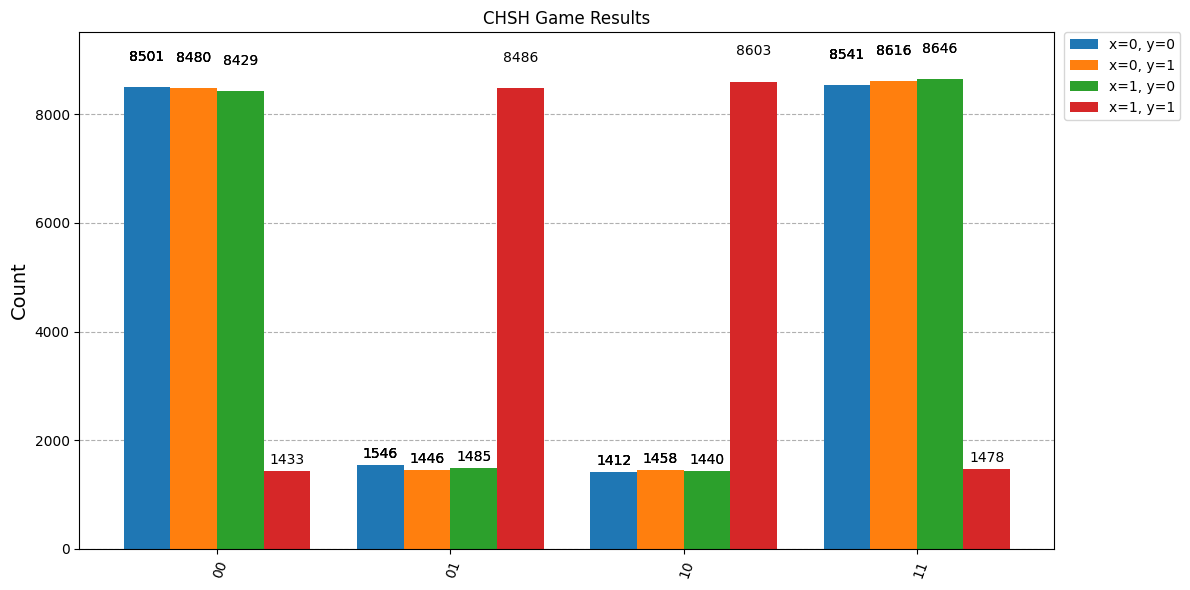

In [3]:
from qiskit_aer import AerSimulator
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram


backend = AerSimulator()  # Use statevector simulator for exact results
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
shots = 20000

circuits = []
input_pairs = list(product([0, 1], repeat=2))  # (x, y) pairs
for x, y in input_pairs:
    qc = create_chsh_circuit(x, y)
    circuits.append(qc)

qc_isa = pm.run(circuits)  # Optimize circuits
sampler = Sampler(mode=backend)
job = sampler.run(qc_isa, shots=shots)
results = job.result()

counts_list = [result.data.c.get_counts() for result in results]

# Show histogram of results
plot_histogram(
    counts_list,
    figsize=(12, 6),
    legend=[f"x={x}, y={y}" for x, y in input_pairs],
    title="CHSH Game Results")

Show the win rates for each input pair, and the overall win rate.

In [4]:
total_wins  = 0
total_shots = 0

for (x, y), counts in zip(input_pairs, counts_list):
    for bitstring, count in counts.items():
        # Qiskit bit-string order is "b a" (MSB first)
        b = int(bitstring[0])      # Bob’s bit
        a = int(bitstring[1])      # Alice’s bit
        if (a ^ b) == (x & y):     # CHSH win condition
            total_wins += count
        total_shots += count

win_rate = total_wins / total_shots
print(f"CHSH quantum win-rate ≈ {win_rate*100:.2f}%")

P_win_quantum_theory = np.cos(np.pi / 8)**2  # ~0.8536
print(f"CHSH quantum win-rate (theory) ≈ {P_win_quantum_theory*100:.2f}%")


CHSH quantum win-rate ≈ 85.38%
CHSH quantum win-rate (theory) ≈ 85.36%
